# Fraud Dataset - Predict whether the customers will be a defaulter or not.

## In this project we will identify whether customer will be a defaulter or not.

In [2]:
# Library setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("fraud_dataset.csv")
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1
2,1,1,0,1,1,3000,0,66,360,1,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    827 non-null    int64
 1   Married                   827 non-null    int64
 2   Dependents                827 non-null    int64
 3   Education                 827 non-null    int64
 4   Self_Employed             827 non-null    int64
 5   ApplicantIncome           827 non-null    int64
 6   CoapplicantIncome         827 non-null    int64
 7   LoanAmount                827 non-null    int64
 8   Loan_Term                 827 non-null    int64
 9   Credit_History_Available  827 non-null    int64
 10  Housing                   827 non-null    int64
 11  Locality                  827 non-null    int64
 12  Fraud_Risk                827 non-null    int64
dtypes: int64(13)
memory usage: 84.1 KB


In [5]:
fraud = len(df[df['Fraud_Risk']==0])
notfraud = len(df[df['Fraud_Risk']==1])

pct_fraud = fraud/(fraud+notfraud)
print("percentage of non fraud Risk is", round(pct_fraud*100,2))

pct_notfraud = notfraud/(fraud+notfraud)
print("Percentage of Not Fraud Risk", round(pct_notfraud*100,2))

percentage of non fraud Risk is 42.32
Percentage of Not Fraud Risk 57.68


The Correlation

Text(0.5, 1.0, 'Correlation between two variable')

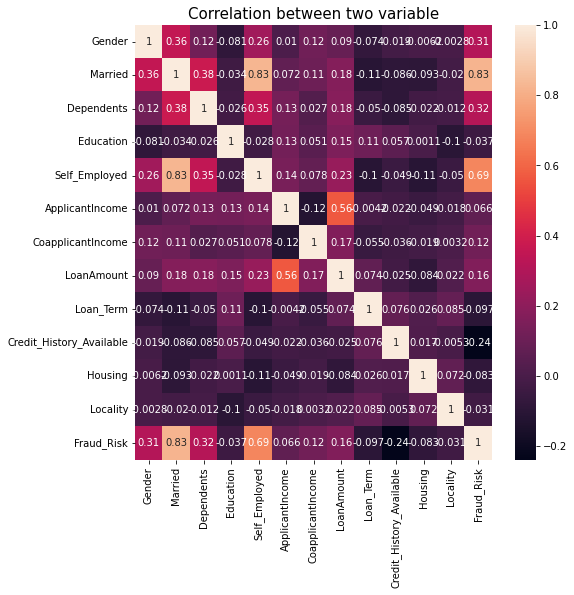

In [7]:
plt.figure(figsize= (8,8))

sns.heatmap(df.corr(method='pearson'), annot=True)
plt.title("Correlation between two variable", size=15)

Text(0.5, 1.0, 'Covariance')

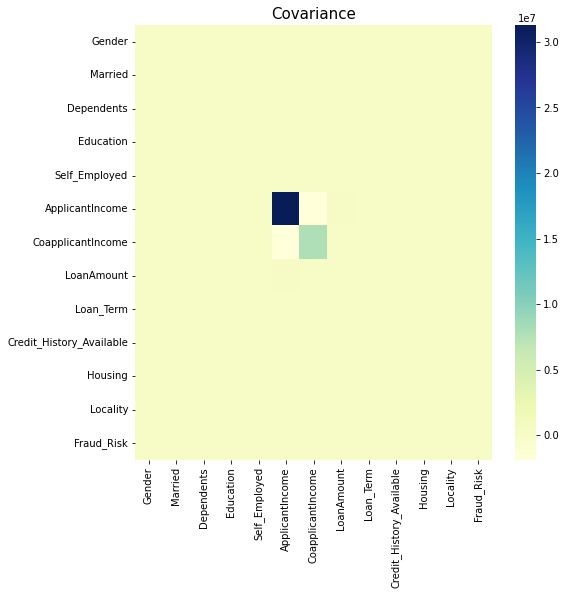

In [8]:
#visualize covariance
plt.figure(figsize= (8,8))

sns.heatmap(df.cov(), cmap="YlGnBu")
plt.title("Covariance", size=15)

Text(0.5, 1.0, 'Covariance')

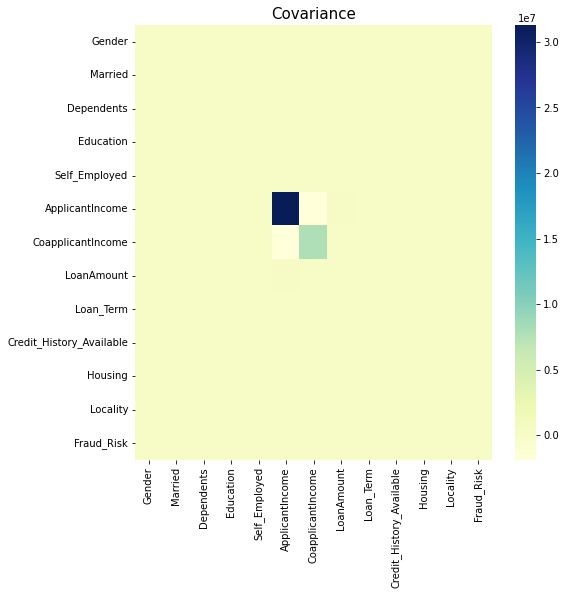

In [9]:
#visualize covariance
plt.figure(figsize= (8,8))

sns.heatmap(df.cov(), cmap="YlGnBu")
plt.title("Covariance", size=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


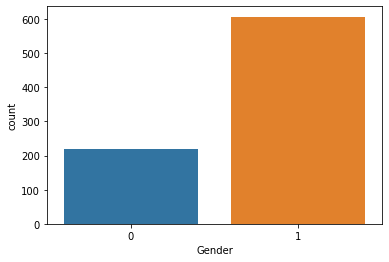

In [10]:
sns.countplot(df['Gender'], label='Fraud_Risk')

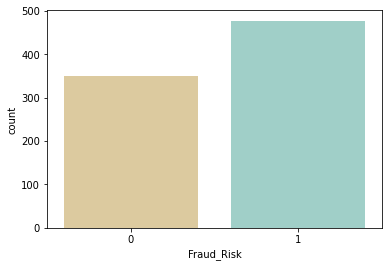

In [11]:
sns.countplot(x='Fraud_Risk', data=df, palette = 'BrBG')

In [12]:
df.groupby('Fraud_Risk').mean()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality
Fraud_Risk,,,,,,,,,,,,
0,0.574286,0.000000,0.308571,0.808571,0.177143,4779.974286,1092.642857,125.611429,346.685714,0.974286,0.700000,2.005714
1,0.851153,0.834382,0.905660,0.777778,0.865828,5530.683438,1774.714885,152.104822,331.849057,0.819706,0.620545,1.958071


Married and Self-Employed are strongly positively correlated with the target variable, Fraud Risk, as can be shown.

In [13]:
x = df.drop(['Fraud_Risk'],axis=1)
y = df['Fraud_Risk']
print(x.shape)
print(y.shape)

(827, 12)
(827,)


Feature Scaling

When the features of the input dataset fluctuate significantly between their ranges or are simply measured in different units of measure, StandardScaler enters the picture. The data are scaled to the unit variance after the mean is removed via StandardScaler.

In [14]:
#standardise the Dataset by Standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x=sc.fit_transform(x)

# Train- Test Split

In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1000)

# Applying models - Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(x_train,y_train)


LogisticRegression(random_state=42)
lr_train_pred = lr.predict(x_train)
lr_test_pred = lr.predict(x_test)

lr_score_train = lr.score(x_train,y_train)
lr_score_test = lr.score(x_test,y_test)

In [18]:
print(lr_score_test)

0.9216867469879518


# Conclusion
## Logistic Regressor has given us the more than required accuracy, hence this model can be accepted. \